<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/IMT_ex_avaliativo_graphs_3_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [2]:
#@markdown Nome completo e RA (*\<nome\>, \<RA\>*)
Aluno = 'Daniel Henrique, 1115665' #@param {type:"string"}






In [3]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/"


In [4]:
def gera_amostra(mu, sigma, n, nr_invalid):
  import numpy as np
  import pandas as pd

  valores_aleatorios = np.random.normal(mu, sigma, n)

  if len(valores_aleatorios[ valores_aleatorios < norm.ppf(0.025, loc=mu, scale=sigma) ]) > 0:
    valores_aleatorios[ valores_aleatorios < norm.ppf(0.025, loc=mu, scale=sigma) ] = norm.ppf(0.06, loc=mu, scale=sigma)

  if nr_invalid > 0:
    valores_aleatorios[np.random.choice(n, nr_invalid, replace=False)] = norm.ppf(0.010, loc=mu, scale=sigma)

  df = pd.DataFrame({'peso_cafe': valores_aleatorios})

  return df, len(valores_aleatorios[ valores_aleatorios < norm.ppf(0.025, loc=mu, scale=sigma) ])

In [5]:
mu = 1
sigma = 0.05

amostra_1, nr_invalid = gera_amostra(mu, sigma, 60, 4)
amostra_2, nr_invalid = gera_amostra(mu, sigma, 100, 2)
amostra_3, nr_invalid = gera_amostra(mu, sigma, 60, 1)
amostra_max, nr_invalid = gera_amostra(mu, sigma, 80, 5)
amostra_min, nr_invalid = gera_amostra(mu, sigma, 120, 1)

amostra_1.to_csv('amostra_cafe_1.csv', index=False)
amostra_2.to_csv('amostra_cafe_2.csv', index=False)
amostra_3.to_csv('amostra_cafe_3.csv', index=False)
amostra_min.to_csv('amostra_cafe_min.csv', index=False)
amostra_max.to_csv('amostra_cafe_max.csv', index=False)


# **Case: Café**

Marcas de café têm na embalagem anotado que o peso líquido é de 1 Kg $\pm$ 0.05 (distribuição normal). Você quer fazer uma rotina para analisar amostras de diferentes fornecedores, rejeitando fornecedores cuja as amostras estão estão abaixo do intervalo de confiança de 95% do peso, embora aceite pesos acima. Para facilitar o uso da rotina pelo time comercial você faz uma rotina que exibe o resultado sobre as amostras como a seguir.

Dicas (opcionais):
1. Você vai empregar as funções `norm.pdf()` e `norm.ppf()`
2. Para o sobreado abaixo da curva empregue `ax.fill_between()`
3. Assinatura sugerida da função: `def analisa_amostra(df, mu, sigma, ax)`





In [6]:
df1 = pd.read_csv(path + 'amostra_cafe_1.csv')
display(df1.head())
df2 = pd.read_csv(path + 'amostra_cafe_2.csv')
display(df2.head())
df3 = pd.read_csv(path + 'amostra_cafe_3.csv')
display(df3.head())

,peso_cafe
0,1.006539
1,0.922261
2,0.883683
3,0.979279
4,1.007257


,peso_cafe
0,1.002032
1,0.941586
2,0.991946
3,1.001016
4,1.058258


,peso_cafe
0,0.964969
1,0.920406
2,0.984333
3,1.056115
4,0.918081


In [7]:
def analisa_amostra(df, mu, sigma, ax):
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.stats import norm

  # fig, ax = plt.subplots(1,1,figsize=(7, 4))

  # pdf norm
  x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
  y = norm.pdf(x, mu, sigma)

  ax.plot(x, y)

  # 95%
  inf = norm.ppf(0.025, loc=mu, scale=sigma)
  sup = norm.ppf(0.975, loc=mu, scale=sigma)

  x_fill = np.linspace(inf, sup, 100)
  y_fill = norm.pdf(x_fill, mu, sigma)

  ax.fill_between(x_fill, y_fill, color='green', alpha=0.1)

  ax.vlines(inf, 0, norm.pdf(inf, mu, sigma), color='darkred', linewidth=2, label='inf')
  ax.vlines(sup, 0, norm.pdf(sup, mu, sigma), color='green', linewidth=2, label='sup')

  ax.text(mu,norm.pdf(mu, mu, sigma)/2,'95%',ha='center', va='center', fontsize=16,weight='bold',color='darkblue')

  # verifica amostra e annotate
  perc_inf = len(df[ df.peso_cafe < norm.ppf(0.025, loc=mu, scale=sigma)]) / len(df) * 100

  xmin, xmax = ax.get_xlim()
  ymin, ymax = ax.get_ylim()

  if perc_inf > 2.5:
    ax.annotate('Fornecedor Rejeitado\nEncontrados ' + str(np.round(perc_inf,2)) + '% abaixo do peso',
                xy=(norm.ppf(0.015, loc=mu, scale=sigma),norm.pdf(norm.ppf(0.015, loc=mu, scale=sigma), loc=mu, scale=sigma)/2),  # ponto do gráfico
                xytext=(mu-3*sigma,(ymax-ymin)/4),                # posição do texto
                arrowprops=dict(arrowstyle="->",color='darkred'),
                weight='bold',
                color='darkred',
                fontsize=9)
  else:
    ax.annotate('Fornecedor Aceito\nEncontrados ' + str(100-np.round(perc_inf,2)) + '% acima do peso mínimo',
                xy=(mu,norm.pdf(mu,loc=mu, scale=sigma)/8),  # ponto do gráfico
                xytext=(mu-3*sigma,(ymax-ymin)/4),                # posição do texto
                arrowprops=dict(arrowstyle="->",color='darkgreen'),
                weight='bold',
                color='darkgreen',
                fontsize=9)

  # ornamentos
  ax.set_title('Análise da Amostra',fontsize=14,weight='bold',color='darkblue')
  ax.set_xlabel('Peso Esperado (Distribuição Normal)',color='darkblue')
  ax.set_ylabel('Densidade de Probabilidade',color='darkblue')

  ax.legend(fontsize=10)
  # plt.show()

  return


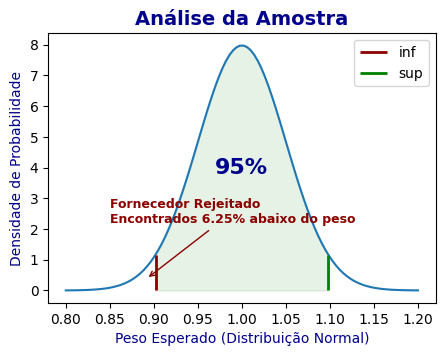

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5, 3.5))

mu = 1
sigma = 0.05

analisa_amostra(amostra_max, mu, sigma, ax)
plt.show()

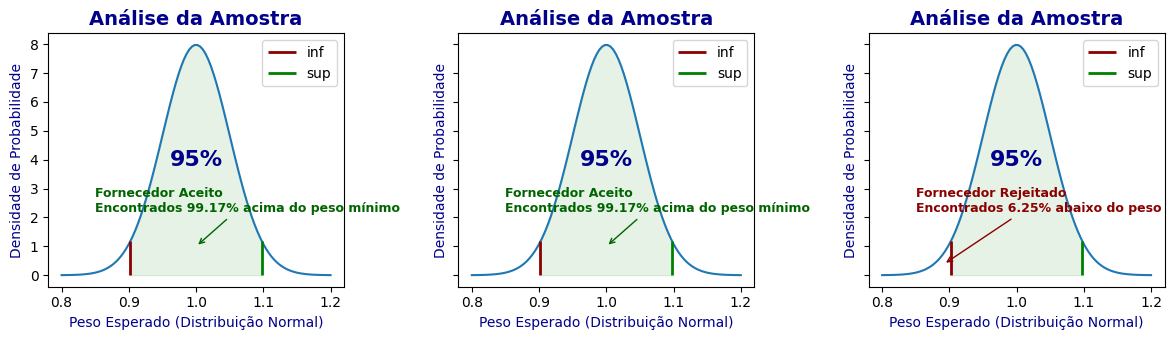

In [9]:
fig, ax = plt.subplots(1,3,figsize=(12, 3.5),sharey=True)

mu = 1
sigma = 0.05

for i, df in zip(range(3),[amostra_min, amostra_min, amostra_max]):
  analisa_amostra(df, mu, sigma, ax[i])

plt.tight_layout()
plt.show()

A rotina ainda deve funcionar para outras embalagens de café, como sacas de 60Kg, pacotes de 10 e 5Kg etc. que apresentam peso médio e desvio padrão diferente. Abaixo, a análise de sacas de 60Kg $\pm$ 0.1.

In [10]:
amostra_cafe_extra, nr_invalid = gera_amostra(60, 0.1, 120, 8)
amostra_cafe_extra.to_csv('amostra_cafe_extra.csv', index=False)
amostra_cafe_extra.head()

,peso_cafe
0,60.019896
1,60.144543
2,60.078092
3,59.923291
4,60.070124


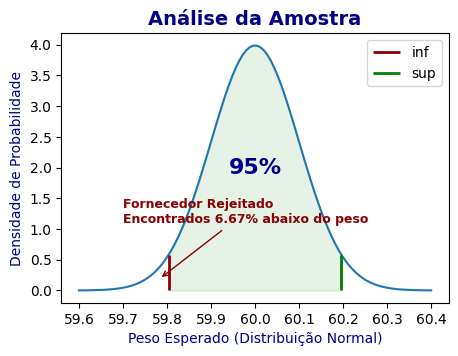

In [11]:
df_saca = pd.read_csv(path + 'amostra_cafe_extra.csv')

fig, ax = plt.subplots(1,1,figsize=(5, 3.5))

mu = 60
sigma = 0.1

analisa_amostra(df_saca, mu, sigma, ax)
plt.show()

# **CASE: Beer Production**

Você quer fazer analise dos estados produtores de cerveja com produção acima da média dos estados (produção de todos os anos). Para facilitar o uso da rotina pelo time de gestão de produção dos estados você faz uma rotina que exibe o resultados como a seguir, permitindo destacar um dos estados.

Dicas (opcionais):

1. Empregue e altere a rotina `add_value_labels` para adicionar valores às barras
2. Acesse as propriedade `ax.get_xticklabels()[...].set_color('darkred')` e     `ax.patches[...].set_facecolor()` para setar os destaques.

In [12]:
def add_value_labels(ax, spacing=5):
    """Adiciona os valores em cima das barras de um gráfico Seaborn."""
    for bar in ax.patches:
        y_value = bar.get_height()
        x_value = bar.get_x() + bar.get_width() / 2

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, spacing),        # Vertically shift label by `spacing`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va='bottom'
        )

Aqui a rotina modificada...

In [13]:
def add_value_labels(ax, spacing=5):
    """Adiciona os valores em cima das barras de um gráfico Seaborn."""
    for bar in ax.patches:
        y_value = bar.get_height()
        x_value = bar.get_x() + bar.get_width() / 2

        # Use Y value as label and format number with one decimal place
        # label = "{:.1f}".format(y_value)
        label = "{:d}".format(int(y_value)) + "K"


        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, spacing),        # Vertically shift label by `spacing`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va='bottom',
            weight='bold',
            fontsize=12
        )

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')
df.head()

,state,year,barrels,type
0,AK,2008,2067.69,On Premises
1,AK,2009,2263.65,On Premises
2,AK,2010,1929.15,On Premises
3,AK,2011,2251.02,On Premises
4,AK,2012,2312.43,On Premises


In [1]:
def analisa_producao(df_in, state, ax):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd
  import numpy as np

  # pre processamento
  df_local = df_in.copy()
  df_local.barrels = df_local.barrels.fillna(0)
  df_local.barrels  = df_local.barrels / 1000
  df_local.barrels  = df_local.barrels.astype(int)

  # obtem a lista dos acima da média ordenada
  df_local_group = df_local[ df_local.state != 'total' ].groupby('state').barrels.mean()[ df_local[ df_local.state != 'total' ].groupby('state').barrels.mean() > df_local.barrels.mean() ]
  df_local_group = df_local_group.sort_values(ascending=False)
  # display(df_local_group.head())

  lista_sem_total = df_local_group.index.to_list()

  # plot
  sns.barplot(x='state', y='barrels',
              data=df_local[ df_local.state.isin(lista_sem_total) ],
              ax=ax, order=lista_sem_total, alpha=0.5)

  # adiciona valores
  add_value_labels(ax)

  # faz destaque
  if lista_sem_total.count(state) > 0:
    ax.get_xticklabels()[lista_sem_total.index(state)].set_color('darkred')
    ax.patches[lista_sem_total.index(state)].set_facecolor('darkred')

  # ornamentos
  ax.set_xlabel('Estado',color='darkblue')
  ax.set_ylabel('Barris (K)',color='darkblue')
  ax.set_title('Milhares de Barris Produzidos - ' + str(df_local.year.min()) + ' a ' + str(df_local.year.max()) +
              '\n(Estados com produção acima da média)',fontsize=14,weight='bold',color='darkblue')
  ax.tick_params(axis='x',labelsize=12)

  plt.tight_layout()

  return

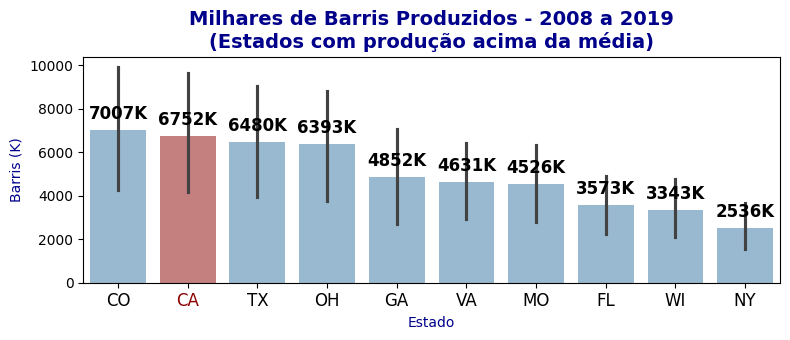

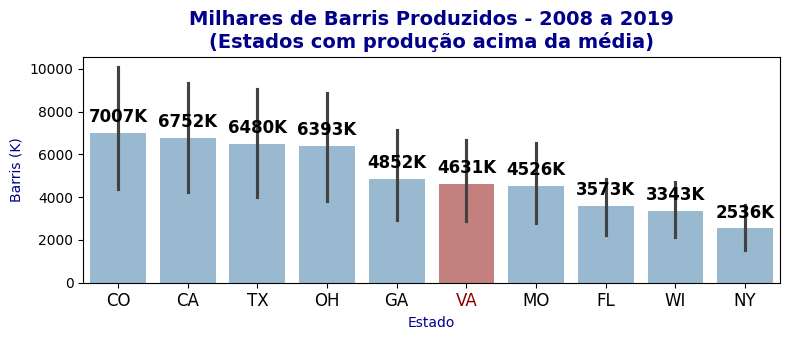

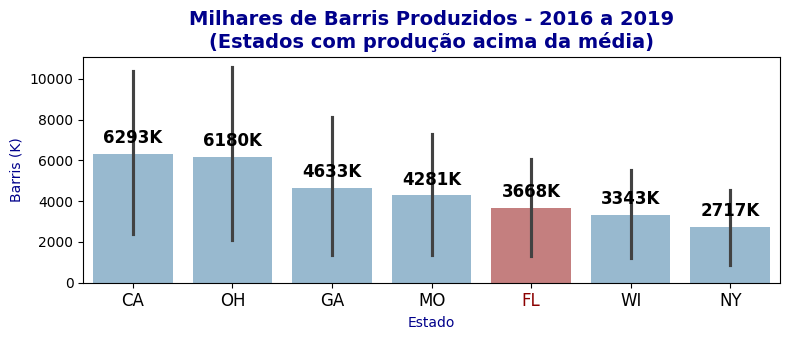

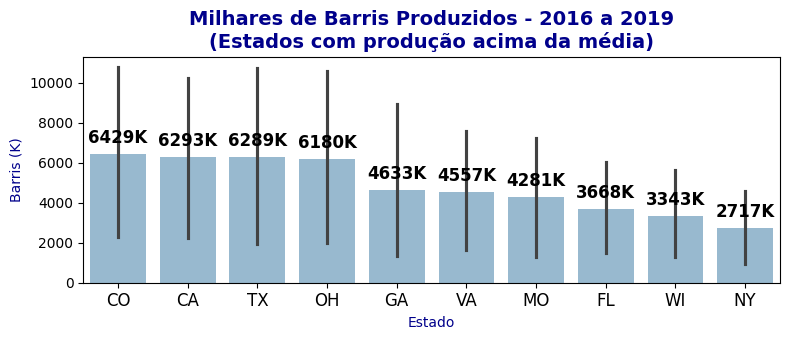

In [15]:
fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df, 'CA', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df, 'VA', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df[ (df.year > 2015) & (~df.state.isin(['VA','CO','TX'])) ], 'FL', ax)
plt.show()

fig, ax = plt.subplots(figsize=(8,3.5))
analisa_producao(df[ df.year > 2015 ], 'XX', ax)
plt.show()
